# Exercise: Chicago Food Deserts

#### Summary

Looking at census tracts in Chicago to find food deserts - places without a good source of food.

#### Data Source(s)

All data from the city of Chicago

#### Files

- `Boundaries - Census Tracts - 2010.zip`, census tracts in Chicago from [here](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Tracts-2010/5jrd-6zik)
- `Grocery_Stores_-_2013.csv`, grocery stores in Chicago from [here](https://data.cityofchicago.org/Community-Economic-Development/Grocery-Stores-2013/53t8-wyrc)

#### Data dictionary

Visit the "here" links above. Scroll down a little and click 'Show All' to see every column.

#### Skills

- Opening shapefiles
- Opening CSV files as geography
- Reprojecting
- Buffers

# Import what you'll need to do geographic work

Probably pandas, geopandas, and the shapely thing that lets you make Points

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

## Read in the census tract boundaries for Chicago

Give it a name that makes sense, like `tracts`.

In [2]:
tracts = gpd.read_file('Boundaries - Census Tracts - 2010/geo_export_085dcd7b-113c-4a6d-8d43-5926de1dcc5b.shp')
tracts.head()

,commarea,commarea_n,countyfp10,geoid10,geometry,name10,namelsad10,notes,statefp10,tractce10
0,44,44.0,031,17031842400,POLYGON ((-87.62404799998049 41.73021699998396...,8424,Census Tract 8424,,17,842400
1,59,59.0,031,17031840300,"POLYGON ((-87.6860799999848 41.82295600001154,...",8403,Census Tract 8403,,17,840300
2,34,34.0,031,17031841100,"POLYGON ((-87.62934700001182 41.8527970000265,...",8411,Census Tract 8411,,17,841100
3,31,31.0,031,17031841200,POLYGON ((-87.68813499997718 41.85569099999095...,8412,Census Tract 8412,,17,841200
4,28,28.0,031,17031838200,"POLYGON ((-87.66781999997529 41.8741839999791,...",8382,Census Tract 8382,,17,838200


### Confirm that you have 10 columns and 801 rows

In [3]:
tracts.shape

(801, 10)

### What does the data look like? What columns do you have?

### Plot it to see if it looks okay

## Read in the grocery store data for Chicago

Note that you'll be reading in a **csv, not a shapefile**. This takes an extra conversion step to turn it into a GeoDataFrame - hopefully you have an easy cut-and-paste from last class!

Give it a name that makes sense, like `grocery_stores`.

In [4]:
#step one: read in as a normal dataframe 
df = pd.read_csv("Grocery_Stores_-_2013.csv")
df.head()

,STORE NAME,LICENSE ID,ACCOUNT NUMBER,SQUARE FEET,BUFFER SIZE,ADDRESS,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,WARD,CENSUS TRACT,CENSUS BLOCK,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,200 LIQUORS,48663.0,17055.0,5000.0,B,204 E 47TH ST,60653,GRAND BOULEVARD,38,3,17031381500,1.703138e+14,1.178462e+06,1.873949e+06,41.809424,-87.620952,"(41.8094238941, -87.6209518020)"
1,3600 COMMISSARY,24279.0,9830.0,3800.0,B,3600 N LAKE SHORE DR,60613,LAKE VIEW,6,46,17031060900,1.703106e+14,1.171866e+06,1.924645e+06,41.948684,-87.643650,"(41.9486836744, -87.6436497585)"
2,4343 PETES FRESH MARKET,1336669.0,260303.0,57000.0,A,4343 S PULASKI RD,60632,ARCHER HEIGHTS,57,14,17031570100,1.703157e+14,1.150448e+06,1.875370e+06,41.813914,-87.723665,"(41.8139143113, -87.7236649419)"
3,4700 PETE'S FRESH MARKET,1243125.0,245519.0,45000.0,A,4700 S KEDZIE AVE,60632,BRIGHTON PARK,58,14,17031842800,1.703184e+14,1.155792e+06,1.873271e+06,41.808047,-87.704119,"(41.8080472717, -87.7041188223)"
4,5659 W. DIVERSEY,1575023.0,277375.0,4000.0,B,5659 W DIVERSEY AVE,60639,BELMONT CRAGIN,19,30,17031190602,1.703119e+14,1.137914e+06,1.918002e+06,41.931135,-87.768612,"(41.9311354035, -87.7686121306)"


In [5]:
#take long, lat pairs and turn into points 

In [6]:
#points = df.apply(lambda row: Point(row.LONGITUDE, row.LATITUDE), axis=1)
#points

In [7]:
#make a geodataframe - use the old df and create a new column based on the new points column created above 

In [8]:
#grocery_stores = gpd.GeoDataFrame(df, geometry=points)

In [9]:
#set crs
#grocery_stores.crs = {'init': 'epsg:4326'} 

In [10]:
#grocery_stores.plot()

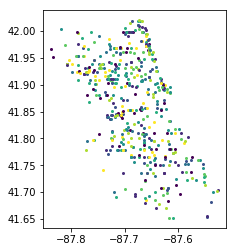

In [11]:
# STEP ONE: read it in as a normal dataframe
# STEP TWO: Take the lon/lat pairs and turn them into points
# STEP THREE: Create a GeoDataFrame from your old DataFrame,
# adding in your brand-new points as a geometry column
# STEP FOUR: Hey!!! I'm just gonna GIVE you a CRS i invented
df = pd.read_csv("Grocery_Stores_-_2013.csv")

points = df.apply(lambda row: Point(row.LONGITUDE, row.LATITUDE), axis=1)
grocery_stores = gpd.GeoDataFrame(df, geometry=points)
grocery_stores.crs = {'init': 'epsg:4326'}
grocery_stores.plot()

### Confirm that you have 506 rows

In [12]:
grocery_stores.shape

(506, 18)

### Plot to make sure it looks okay

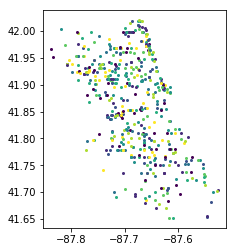

In [13]:
grocery_stores.plot()

## Plot the grocery stores on top of the census tracts.

- Make it look somewhat nice, with a nice grey background and grocery stores that stand out.
- Be sure the CRSes are the same!

(-87.96107629997519, -87.50283170000732, 41.62530410001137, 42.042905899965575)

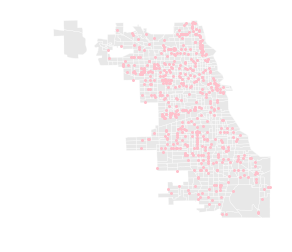

In [14]:
ax = tracts.plot(color='lightgrey', linewidth=0.25, edgecolor='white')
grocery_stores.plot(ax=ax, color = 'pink', markeredgewidth =0, markersize=3)
ax.axis('off')

## Which census tracts don't have a grocery store?

Just in case you forgot, `~` means "does NOT" in pandas. So for example, you might think the following code means **"plot all of the tracts that do NOT contain a grocery store"**.

```pyhon
tracts[~tracts.contains(grocery_stores)].plot()
```

Try it. It doesn't work.

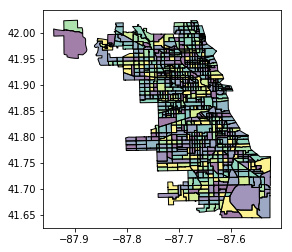

In [15]:
tracts[~tracts.contains(grocery_stores)].plot()

It actually means **"plot all of the tracts that do not contain *every* grocery store"**. Since no census tract contains every grocery store, it won't work.

## Geographic relationships

There are [a lot of other spatial relationships](http://geopandas.org/reference.html), such as:

WHAT DOES THIS ALL MEAN?!? 
* **contains:** has the other object TOTALLY INSIDE (boundaries can't touch!!). A neighborhood contains restaurants 
* **intersects:** Overlaps IN ANY WAY, unless it is just boundaries touching 
* **touches:** Only the boundaries touch. It is like a tangent 
* **within:** is TOTALLY INSIDE of the OTHER OBJECT. A restaurant is within a neighborhood. 
* **disjoint:** No touching 
* **crosses:** goes through but isn't inside. A river crosses a city 



### Plot the census tracts that do not contain ANY grocery stores

In [16]:
#what tracks don't have any grocery stores 
tracts.disjoint(grocery_stores)

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29     False
       ...  
771    False
772    False
773    False
774    False
775    False
776    False
777    False
778    False
779    False
780    False
781    False
782    False
783    False
784    False
785    False
786    False
787    False
788    False
789    False
790    False
791    False
792    False
793    False
794    False
795    False
796    False
797    False
798    False
799    False
800    False
Length: 801, dtype: bool

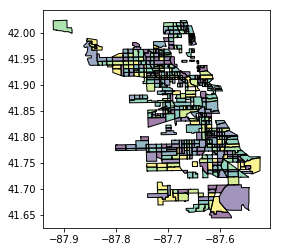

In [17]:
tracts[tracts.disjoint(grocery_stores)].plot()

**But wait: that's not what we're doing!** We're interested in (kind of) people who are **half a mile** from a grocery store.

## Which census tracts are far from a grocery store? Introducing buffer!

`.buffer()` draws a buffer around a point, line, or shape. You can use it to say, "show me things within XXX distance of YYY". Try to take the grocery stores, draw a half-mile buffer around them, and plot it.

**It won't look pretty.**

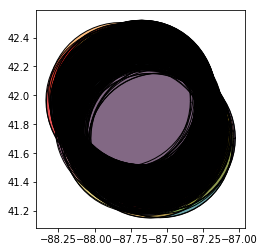

In [18]:
grocery_stores.buffer(0.5).plot()

## That... doesn't work.

Unfortunately `.buffer` uses the units of the current CRS, and the current CRS is **EPSG:4326**. What units is it using? You'll need to ask Google.

In [19]:
grocery_stores.crs

{'init': 'epsg:4326'}

## Reprojecting to be able to use meters

Luckily we can use Mercator, the projection we should all dislike because it looks so ugly, to get units of meters.

You can use the epsg of `3395` if you'd like, or use `{'proj': 'merc'}` - either one is fine.

**How many meters is half a mile?**

- Reproject grocery stores to be Mercator (permanently)
- Create a half-mile buffer, 
- and map it.

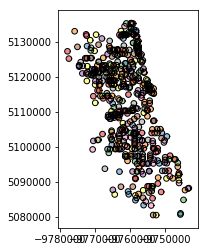

In [20]:
#change the crs 
grocery_stores.to_crs(epsg=3395).buffer(800).plot()

In [21]:
#make sure both maps have the same projections :) 
grocery_stores = grocery_stores.to_crs({'proj': 'merc'})
tracts = tracts.to_crs({'proj': 'merc'})

## Finding our food deserts

First, make a map of **every census tract** and **every grocery store**, along with a **buffer zone** around the grocery stores. You'll need to make sure they're in the **same projection**, and you might want to save the buffer to a new variable (`buffered_grocery_stores`, maybe?). You'll also probably want the buffer zone to be plotted with `alpha=0.5` or something like that to make it a bit transparent.

Actually, just **permanently reproject `tracts` to be Mercator**.

In [22]:
#create a buffer of 800 meters around grocery stores 
buffered_grocery_stores = grocery_stores.buffer(800)

(-9791810.8051522169,
 -9740170.4497897606,
 5076605.650753337,
 5139015.647636042)

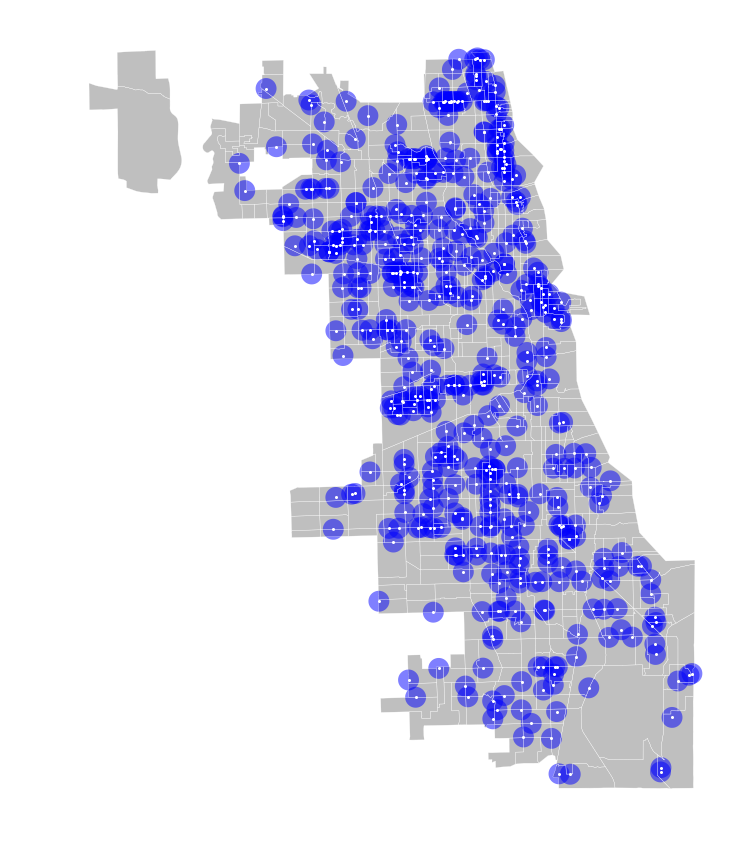

In [23]:
ax = tracts.plot(color='grey', linewidth = 0.25, edgecolor='white', figsize = (20,15))
buffered_grocery_stores.plot(color='blue', ax=ax, markersize=2, linewidth=0)
grocery_stores.plot(color='white', ax=ax, markersize=2, linewidth=0)

ax.axis('off')

## Now add to that the census tracts that do NOT touch one of our buffers.

It... doesn't seem to look right, once again.

(-9791810.8051522169,
 -9740170.4497897606,
 5076605.650753337,
 5139015.647636042)

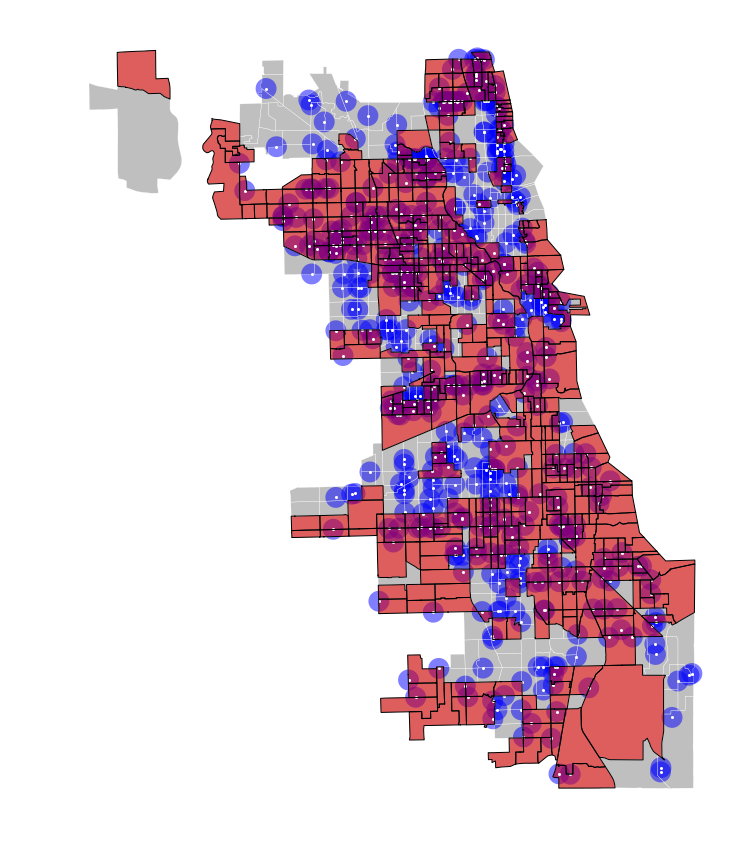

In [24]:
#copied from above + layer of census track with no intersection with 
ax = tracts.plot(color='grey', linewidth = 0.25, edgecolor='white', figsize = (20,15))
buffered_grocery_stores.plot(color='blue', ax=ax, markersize=2, linewidth=0)
grocery_stores.plot(color='white', ax=ax, markersize=2, linewidth=0)
tracts[tracts.disjoint(buffered_grocery_stores)].plot(ax=ax, color='red')
ax.axis('off')

## The sad way of doing it

If you want to do this right, we need to do it **one tract at a time**, and say "hey, do you intersect with any buffers?"

First, let's pull out a single tract.

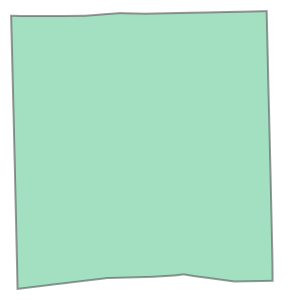

In [25]:
#hey tracts, give me a row with the index of 99
tract = tracts.loc[99]
tract.geometry

In [26]:
tract

commarea                                                      8
commarea_n                                                    8
countyfp10                                                  031
geoid10                                             17031080201
geometry      POLYGON ((-9755101.638494743 5118635.723091542...
name10                                                   802.01
namelsad10                                  Census Tract 802.01
notes                                                          
statefp10                                                    17
tractce10                                                080201
Name: 99, dtype: object

In [27]:
type(tract.geometry)

shapely.geometry.polygon.Polygon

Then, ask it which grocery store buffers it interacts with. **I'm using `.head()` so I don't have to see a big long list**.

In [28]:
#Hey buffered grocery stores...anyone interestect with this specific tract? 
buffered_grocery_stores.intersects(tract.geometry).value_counts()

False    502
True       4
dtype: int64

Instead of a big long list of `True` and `False` for every single comparison, I can say **"hey, were any of those True?"**

In [29]:
#taking one geometry and comparing it to every grocery store buffer 
buffered_grocery_stores.intersects(tract.geometry).any()

True

### Using .intersects and .any() with a .apply

So now we get to the real ugly part: go through every single tract, see if it intersects, and map accordingly.

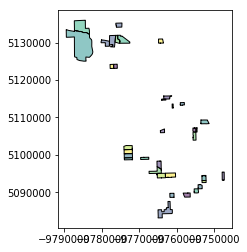

In [30]:
# returns YES if the row intersects with ANY of the grocery stores
def does_intersect(row):
    return buffered_grocery_stores.intersects(row.geometry).any()

# Go through every row, testing for an intersection
# notice the ~ to make it negative
tracts[~tracts.apply(does_intersect, axis=1)].plot()

## Stop crying, please: we can fix this with `.unary_union`

The problem right now is that we're comparing **every single tract** to **every single buffer**. But what if there was only **one buffer** instead of a few hundred?

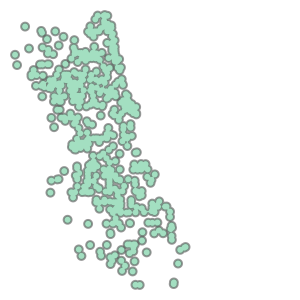

In [31]:
buffered_grocery_stores.unary_union

Look at that!!!! **`.unary_union`** takes a bunch of polygons or whatever and turns them into ONE NICE SIMPLE POYLGON.

And we can use that with our `.intersects` now, really super easily.

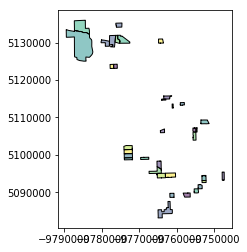

In [32]:
#MANY TO ONE COMPARISONS
#We have many tracts
#but we have one grocery store created by the union above....so you can compare them 
tracts[tracts.disjoint(buffered_grocery_stores.unary_union)].plot()

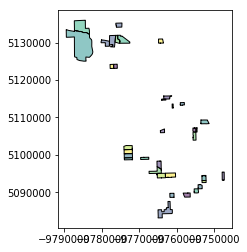

In [33]:
tracts[~tracts.intersects(buffered_grocery_stores.unary_union)].plot()

## Plot that on top of the map you made before, with all of the circles

You'll want to do it AFTER you plot all of the tracts but BEFORE you plot the grocery stores.

(-9791810.8051522169,
 -9740170.4497897606,
 5076605.650753337,
 5139015.647636042)

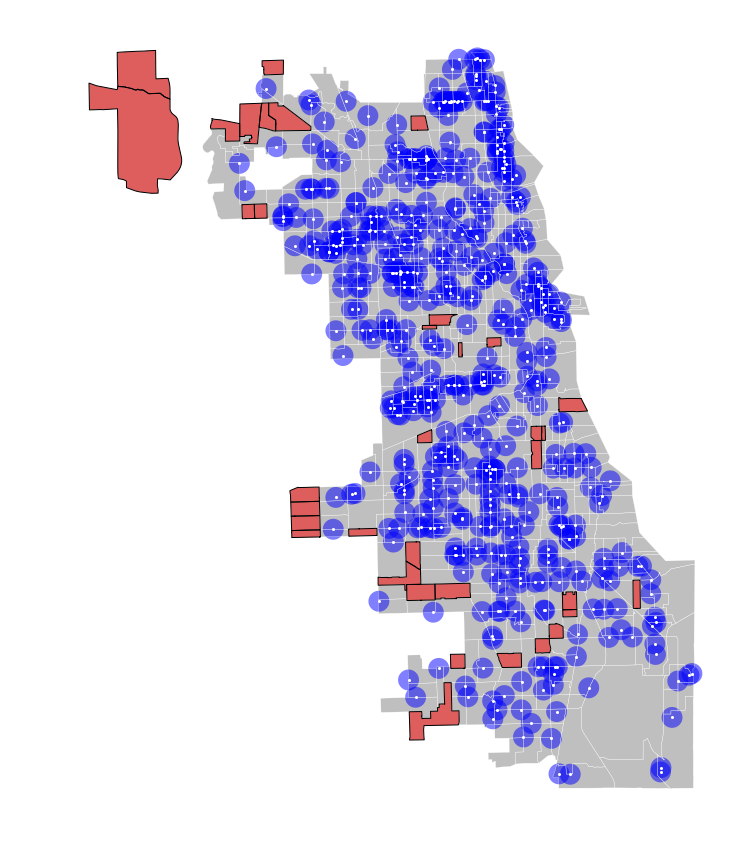

In [34]:
ax = tracts.plot(color='grey', linewidth = 0.25, edgecolor='white', figsize = (20,15))
buffered_grocery_stores.plot(color='blue', ax=ax, markersize=2, linewidth=0)
grocery_stores.plot(color='white', ax=ax, markersize=2, linewidth=0)
tracts[tracts.disjoint(buffered_grocery_stores.unary_union)].plot(ax=ax, color='red') 
ax.axis('off')

## Okay actually though I have bad news

Usually when you do these comparisons, you aren't saying "does ANY part of this census tract touch a buffer zone," you're saying "does the CENTER of this census tract touch a buffer zone?"

**How do we find the center of the census tracts?** It isn't terrible, really.

## Getting the center of the census tracts

The important thing is that they aren't called centers, they're called **centroids**.

And you find them by just typing....... `centroid`.

In [35]:
tracts[~tracts.centroid.within(buffered_grocery_stores.unary_union)]

,commarea,commarea_n,countyfp10,geoid10,geometry,name10,namelsad10,notes,statefp10,tractce10
0,44,44.0,031,17031842400,POLYGON ((-9754264.404603189 5092203.790407264...,8424,Census Tract 8424,,17,842400
4,28,28.0,031,17031838200,POLYGON ((-9759137.081353614 5113622.448989172...,8382,Census Tract 8382,,17,838200
6,53,53.0,031,17031530503,POLYGON ((-9756470.311632894 5082251.334041915...,5305.03,Census Tract 5305.03,,17,530503
7,76,76.0,031,17031760803,POLYGON ((-9778130.635519065 5127934.234250993...,7608.03,Census Tract 7608.03,,17,760803
8,54,54.0,031,17031540102,POLYGON ((-9753686.099848988 5081242.962023841...,5401.02,Census Tract 5401.02,,17,540102
9,54,54.0,031,17031540101,POLYGON ((-9753693.224295937 5081240.438634574...,5401.01,Census Tract 5401.01,,17,540101
10,44,44.0,031,17031440201,"POLYGON ((-9752962.18920397 5094501.675737101,...",4402.01,Census Tract 4402.01,,17,440201
15,29,29.0,031,17031843300,POLYGON ((-9761407.665008919 5111411.345570057...,8433,Census Tract 8433,,17,843300
20,67,67.0,031,17031834900,POLYGON ((-9757649.519000923 5099301.819981472...,8349,Census Tract 8349,,17,834900
24,35,35.0,031,17031842000,POLYGON ((-9754821.669973642 5108275.256741182...,8420,Census Tract 8420,,17,842000


## Which centroids aren't inside of a buffer?

Well, we do the exact same as before, but we ask something like "which centroids are NOT within the grocery store buffer zone?", and then we feed that right back to `tracts`.

## And then we just map it all over again

(-9791810.8051522169,
 -9740170.4497897606,
 5076605.650753337,
 5139015.647636042)

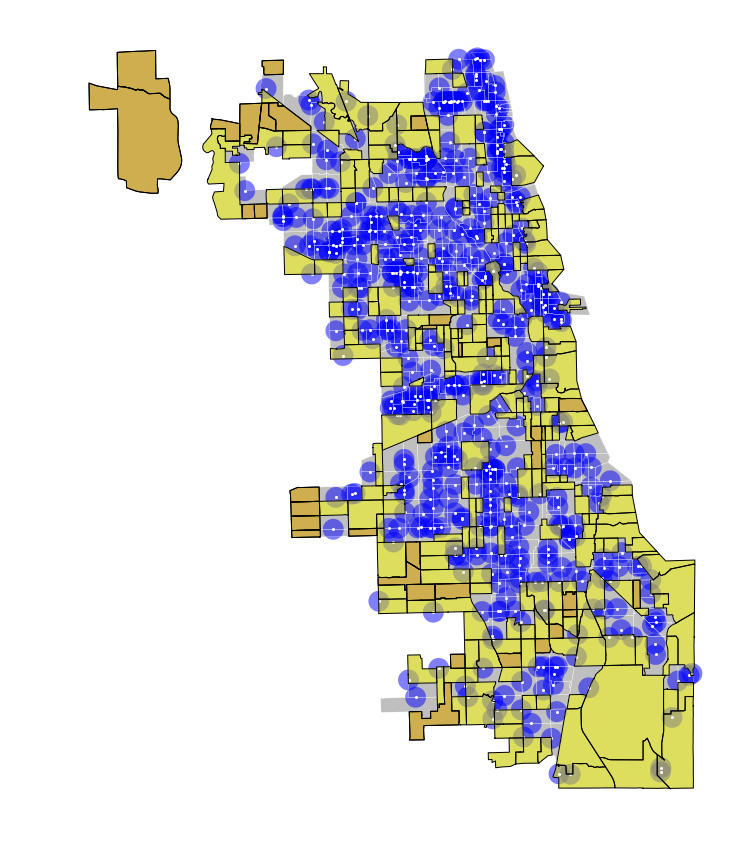

In [36]:
ax = tracts.plot(color='grey', linewidth = 0.25, edgecolor='white', figsize = (20,15))
buffered_grocery_stores.plot(color='blue', ax=ax, markersize=2, linewidth=0)
grocery_stores.plot(color='white', ax=ax, markersize=2, linewidth=0)
tracts[tracts.disjoint(buffered_grocery_stores.unary_union)].plot(ax=ax, color = 'purple')
#tracts[tracts.disjoint(buffered_grocery_stores.unary_union)].plot(ax=ax, color='red') 
tracts[~tracts.centroid.within(buffered_grocery_stores.unary_union)].plot(ax=ax, color='yellow')
ax.axis('off')

## And if we want to get technical and make your brain hurt more

There are two kinds of grocery stores, A and B, and B should have a half-mile radius and A should have a one-mile radius.

In [37]:
def make_fancy_buffer(row):
    if row['BUFFER SIZE'] == 'A':
        return row.geometry.buffer(1600)
    elif row['BUFFER SIZE'] == 'B':
        return row.geometry.buffer(800)
    
fancy_buffer = grocery_stores.apply(make_fancy_buffer, axis=1)

# We need to convert it into a GeoSeries because pandas thinks its a normal series
fancy_buffer = gpd.GeoSeries(fancy_buffer)

### Make the many-layered map again, but this time use `fancy_buffer` instead of `grocery_stores_buffer`